# Selection of Machine Learning Algorithms for the Prediction of Diabetes with EDA

In [3]:
#Importing relevent packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Reading and converting csv data in to data frame
df_raw_data=pd.read_csv('diabetics.csv',skipinitialspace = True)

In [4]:
df_raw_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#Getting column names
df_raw_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
#Shape of the data frame
df_raw_data.shape

(253680, 22)

In [7]:
#Getting quick summary of dataframe
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
#Checking for Null Values
df_raw_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
# Checking duplicates rows 

duplicates_rows = df_raw_data[df_raw_data.duplicated()]
print("Duplicate Rows : ",len(duplicates_rows))
duplicates_rows.head(2)

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0


In [10]:
# Eliminating duplicate rows 
df_raw_data.drop_duplicates(inplace = True)
df_raw_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [11]:
#Check whether the target variable is balanced or not
df_raw_data["Diabetes_binary"].value_counts()


0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

### Balancing Data

In [919]:
def balancing_data():
    df_temp=df_raw_data
    # importing random undersampling and other necessary libraries 
    from collections import Counter
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Separating the independent variables from dependent variables
    X = df_temp.iloc[:,1:]

    # Separating the dependent variables from dependent variables
    y = df_temp.iloc[:,0]

    #Splitting train-test Data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=2)

    # summarizing class distribution
    print("Before undersampling: ", Counter(y_train))

    # definning undersampling strategy
    undersample = RandomUnderSampler(sampling_strategy='majority',random_state=2)

    # fitting and applying the transform
    X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

    # summarizing class distribution
    print("After undersampling: ", Counter(y_train_under))

    df_balanced=X_train_under
    df_balanced["Diabetes_binary"]=y_train_under
    return df_balanced

In [920]:
#Calling fuction to balance data
df_balanced=balancing_data()

Before undersampling:  Counter({0.0: 135932, 1.0: 24699})
After undersampling:  Counter({0.0: 24699, 1.0: 24699})


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Categorizing values of columns 

In [14]:
# Getting column names to a list
col_balanced=list(df_balanced.columns)

# Getting unique values of each column
for name in col_balanced:
    unique_col_val=list(df_balanced[name].unique())
    print(name, ":",unique_col_val)


HighBP : [0.0, 1.0]
HighChol : [0.0, 1.0]
CholCheck : [1.0, 0.0]
BMI : [29.0, 22.0, 24.0, 27.0, 42.0, 32.0, 25.0, 26.0, 23.0, 37.0, 21.0, 40.0, 30.0, 34.0, 20.0, 31.0, 28.0, 58.0, 38.0, 33.0, 43.0, 36.0, 16.0, 19.0, 51.0, 35.0, 18.0, 39.0, 41.0, 46.0, 45.0, 59.0, 17.0, 48.0, 12.0, 74.0, 87.0, 75.0, 52.0, 47.0, 53.0, 71.0, 44.0, 49.0, 15.0, 63.0, 56.0, 81.0, 55.0, 54.0, 50.0, 57.0, 79.0, 14.0, 13.0, 92.0, 60.0, 95.0, 62.0, 73.0, 82.0, 89.0, 84.0, 64.0, 69.0, 77.0, 61.0, 72.0, 65.0, 68.0, 80.0, 67.0, 66.0, 78.0, 70.0, 98.0, 85.0, 83.0]
Smoker : [0.0, 1.0]
Stroke : [0.0, 1.0]
HeartDiseaseorAttack : [0.0, 1.0]
PhysActivity : [1.0, 0.0]
Fruits : [1.0, 0.0]
Veggies : [1.0, 0.0]
HvyAlcoholConsump : [0.0, 1.0]
AnyHealthcare : [1.0, 0.0]
NoDocbcCost : [0.0, 1.0]
GenHlth : [2.0, 3.0, 1.0, 4.0, 5.0]
MentHlth : [0.0, 2.0, 3.0, 15.0, 4.0, 1.0, 20.0, 5.0, 30.0, 10.0, 7.0, 25.0, 6.0, 14.0, 8.0, 12.0, 22.0, 28.0, 16.0, 27.0, 9.0, 21.0, 23.0, 29.0, 18.0, 11.0, 17.0, 13.0, 26.0, 24.0, 19.0]
PhysHlth : [

In [15]:
#Removing general health column from data set 
df_balanced=df_balanced.drop("GenHlth",axis=1)

In [167]:
df_balanced["BMI"].min(),df_balanced["BMI"].max(),df_balanced["BMI"].unique()

(12.0,
 98.0,
 array([29., 22., 24., 27., 42., 32., 25., 26., 23., 37., 21., 40., 30.,
        34., 20., 31., 28., 58., 38., 33., 43., 36., 16., 19., 51., 35.,
        18., 39., 41., 46., 45., 59., 17., 48., 12., 74., 87., 75., 52.,
        47., 53., 71., 44., 49., 15., 63., 56., 81., 55., 54., 50., 57.,
        79., 14., 13., 92., 60., 95., 62., 73., 82., 89., 84., 64., 69.,
        77., 61., 72., 65., 68., 80., 67., 66., 78., 70., 98., 85., 83.]))

In [168]:
def change_bmi(inpt):
    if inpt>=0 and inpt<25:
        return 1
    elif inpt>=25 and inpt<50:
        return 2
    elif inpt>=50 and inpt<75:
        return 3
    elif inpt>=75 and inpt<100:
        return 4
    else:
        return 5
    

In [169]:
df_balanced["MentHlth"].min(),df_balanced["MentHlth"].max(),df_balanced["MentHlth"].unique()

(0.0,
 30.0,
 array([ 0.,  2.,  3., 15.,  4.,  1., 20.,  5., 30., 10.,  7., 25.,  6.,
        14.,  8., 12., 22., 28., 16., 27.,  9., 21., 23., 29., 18., 11.,
        17., 13., 26., 24., 19.]))

In [19]:
def change_mentalHlth(inpt):
    if inpt>=0 and inpt<6:
        return 1
    elif inpt>=6 and inpt<12:
        return 2
    elif inpt>=12 and inpt<18:
        return 3
    elif inpt>=18 and inpt<24:
        return 4
    else:
        return 5
    

In [20]:
df_balanced["PhysHlth"].min(),df_balanced["PhysHlth"].max(),df_balanced["PhysHlth"].unique()

(0.0,
 30.0,
 array([ 0.,  2.,  1., 30., 28.,  5., 21., 15., 24.,  4., 20., 10.,  7.,
        12.,  6.,  8.,  3., 14., 29., 13., 18., 25.,  9., 16., 27., 22.,
        17., 11., 19., 26., 23.]))

In [21]:
def change_PhysHlth(inpt):
    if inpt>=0 and inpt<6:
        return 1
    elif inpt>=6 and inpt<12:
        return 2
    elif inpt>=12 and inpt<18:
        return 3
    elif inpt>=18 and inpt<24:
        return 4
    else:
        return 5
    

In [22]:
df_balanced["Age"].min(),df_balanced["Age"].max(),df_balanced["Age"].unique()

(1.0,
 13.0,
 array([ 9.,  7., 10., 13., 11.,  5.,  1.,  3.,  6.,  8.,  4., 12.,  2.]))

In [23]:
def change_Age(inpt):
    if inpt>=1 and inpt<3: #18-30
        return 1
    elif inpt>=3 and inpt<6: #30-45
        return 2
    elif inpt>=6 and inpt<9: #45-60
        return 3
    elif inpt>=9 and inpt<=12: #60-75
        return 4
    else: # age above 75
        return 5
    

In [24]:
df_balanced["Income"].min(),df_balanced["Income"].max(),df_balanced["Income"].unique()

(1.0, 8.0, array([8., 7., 2., 6., 4., 3., 5., 1.]))

In [25]:
def change_Income(inpt):
    if inpt==1 or inpt==2:  #less than $15000
        return 1
    elif inpt==3 or inpt==4: #$15,000 to less than $25,000
        return 2
    elif inpt==5 or inpt==6: #$25,000 to less than $50,000
        return 3
    else: #$50,000 or more
        return 4
    
    

In [26]:
df_balanced["Education"].min(),df_balanced["Education"].max(),df_balanced["Education"].unique()

(1.0, 6.0, array([5., 4., 6., 3., 2., 1.]))

In [170]:
def change_Education(inpt):
    if inpt==1 or inpt==2 or inpt==3:  #Did not graduate High School
        return 1
    elif inpt==4: #Graduated High School
        return 2
    elif inpt==5: #Attended College or Technical School
        return 3
    else: #Graduated from College or Technical School
        return 4
    
    

In [171]:
#calling functions to restructure values of columns
df_balanced["BMI_new"]=df_balanced["BMI"].apply(change_bmi)
df_balanced["MentHlth_new"]=df_balanced["MentHlth"].apply(change_mentalHlth)
df_balanced["PhysHlth_new"]=df_balanced["PhysHlth"].apply(change_PhysHlth)
df_balanced["Age_new"]=df_balanced["Age"].apply(change_Age)
df_balanced["Income_new"]=df_balanced["Income"].apply(change_Income)
df_balanced["Education_new"]=df_balanced["Education"].apply(change_Education)

In [172]:
#removing columns after re-structuring
df_new=df_balanced.drop(["BMI","MentHlth","PhysHlth","Age","Income","Education"],axis=1)

In [173]:
df_new.head(3)

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,DiffWalk,Sex,Diabetes_binary,BMI_new,MentHlth_new,PhysHlth_new,Age_new,Income_new,Education_new
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2,1,1,4,4,3
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1,1,1,3,4,2
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1,1,1,4,4,3


## Exploratory Data Analysis

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',
       'Diabetes_binary', 'BMI_new', 'MentHlth_new', 'PhysHlth_new', 'Age_new',
       'Income_new', 'Education_new'],
      dtype='object')


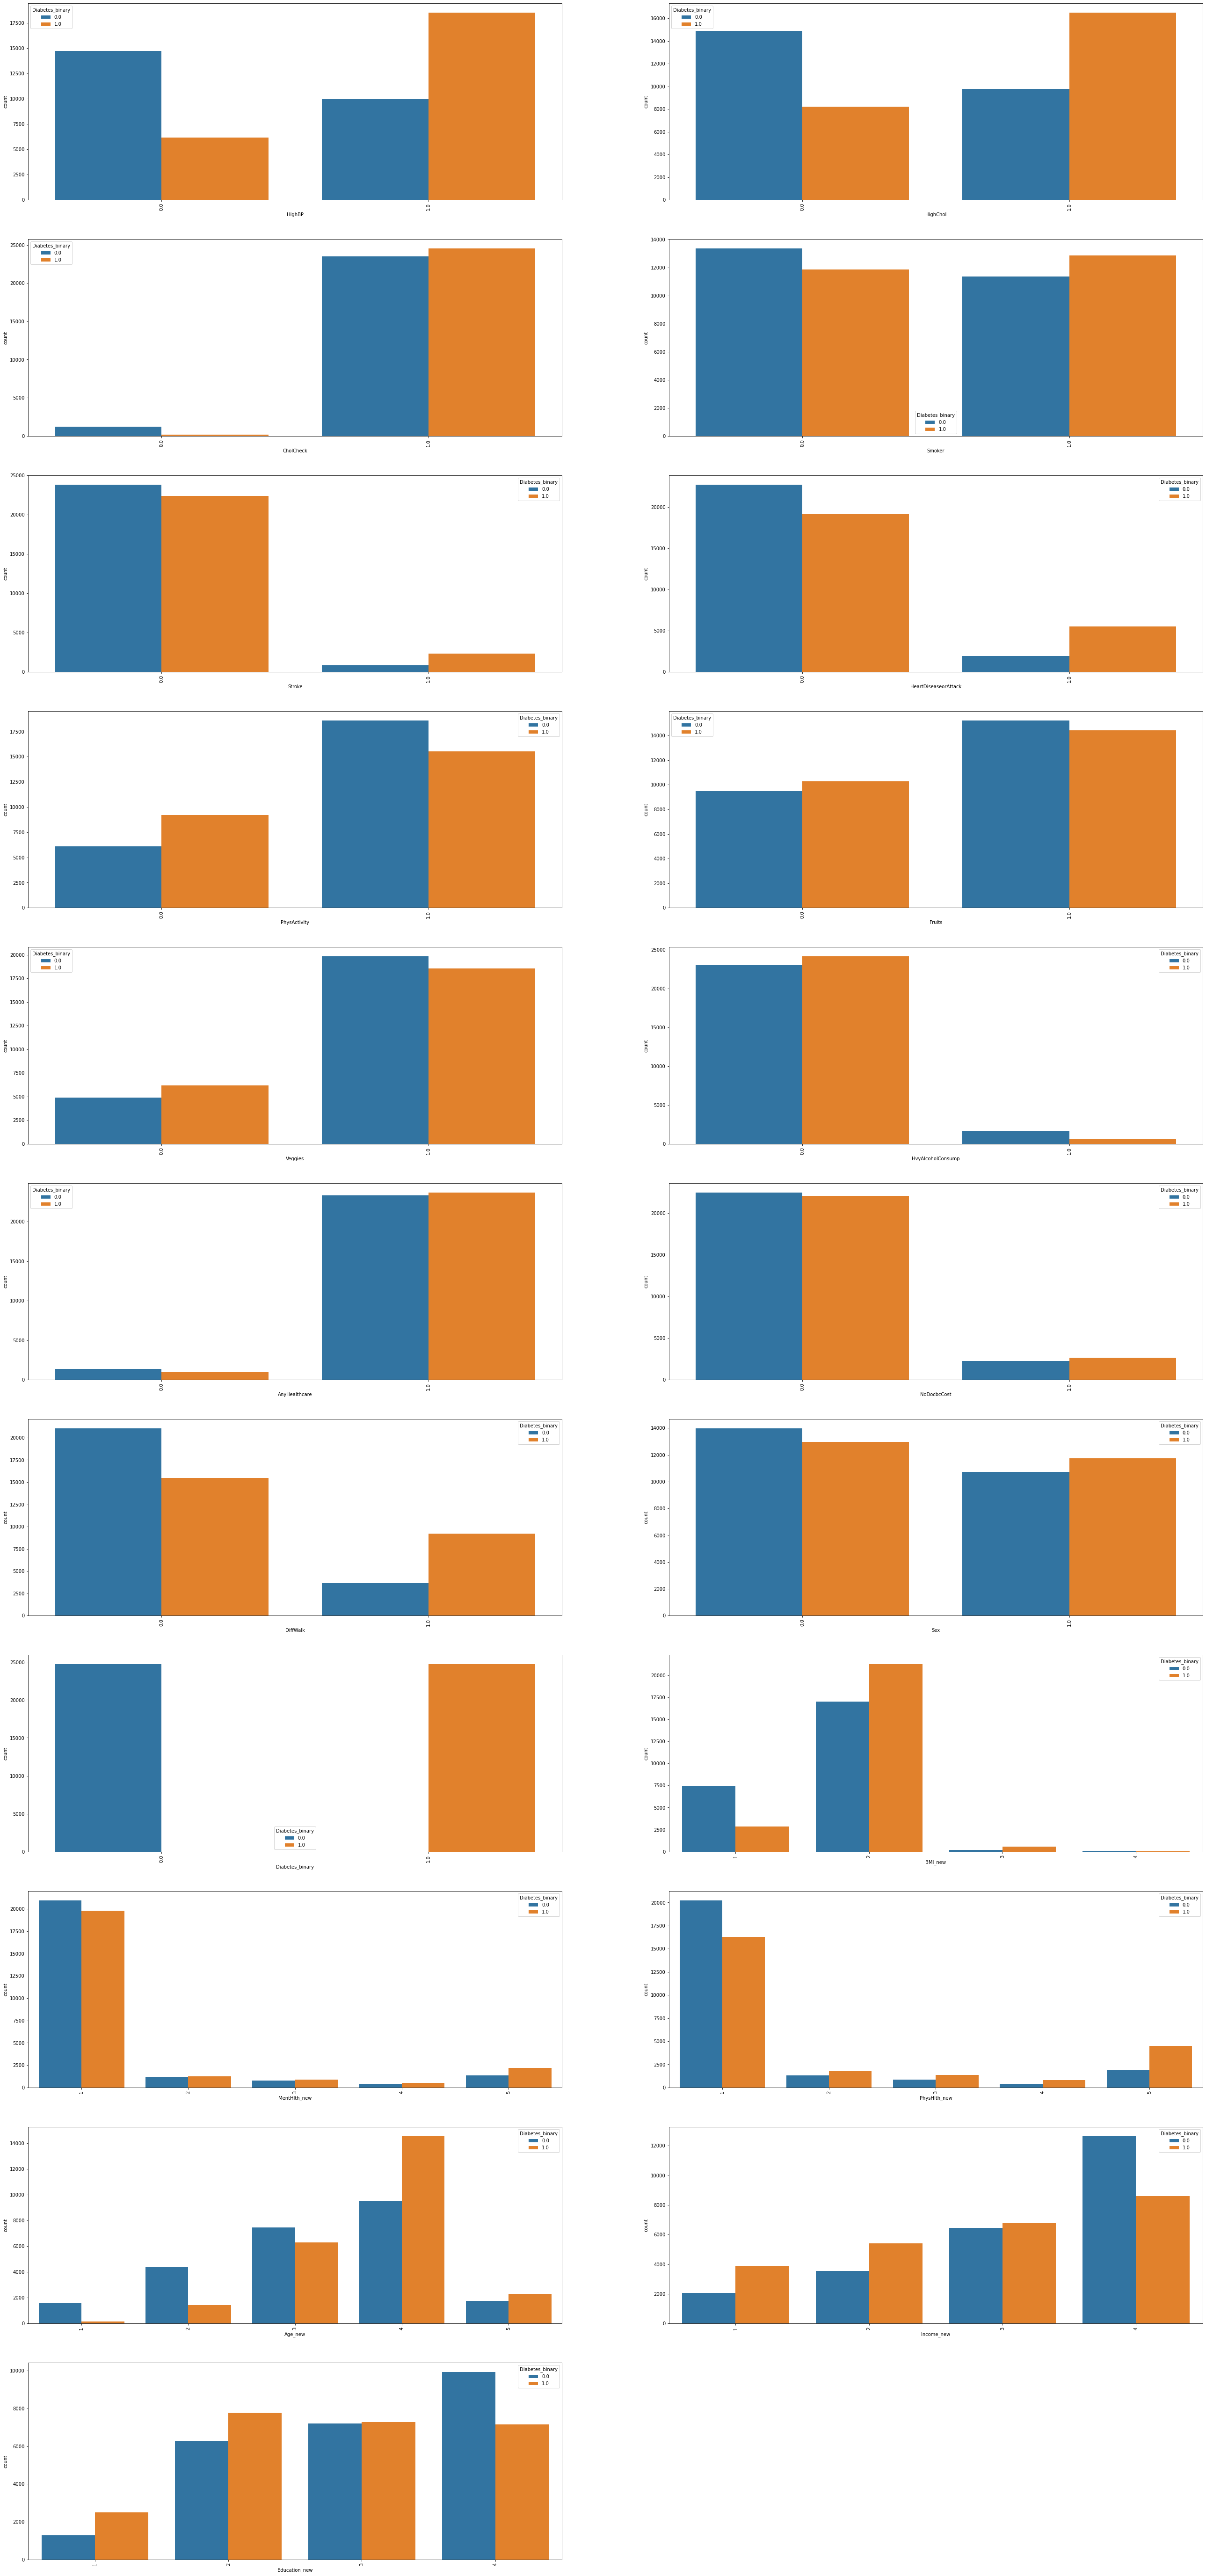

In [174]:
#plotting count plots 
Input_list=df_new.columns


print(Input_list)

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (45,184))
x="x"
for i in range(len(Input_list)):
    x="x"+"a"
    x= fig.add_subplot(20,2,i+1)
    sns.countplot(data = df_new, x =Input_list[i] ,hue='Diabetes_binary',ax=x)
    plt.xticks(rotation=90)


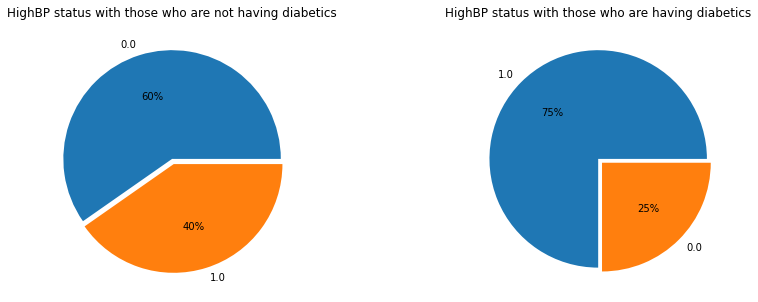

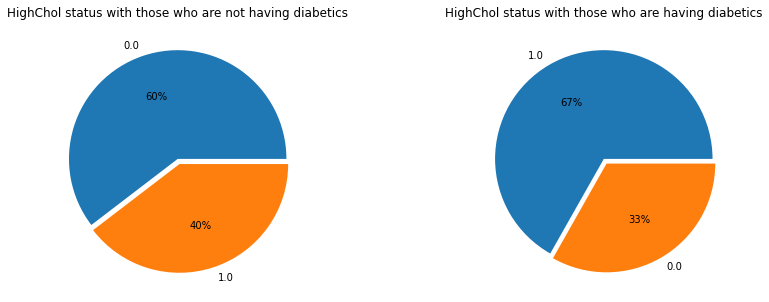

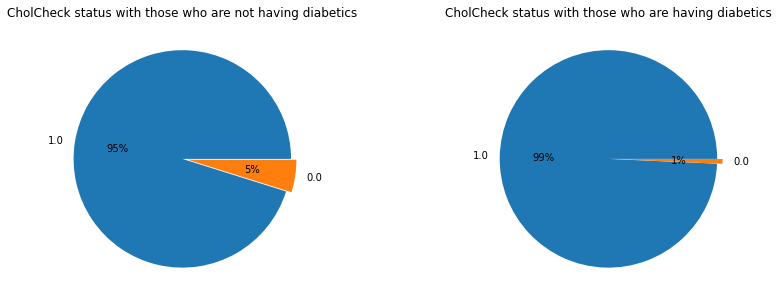

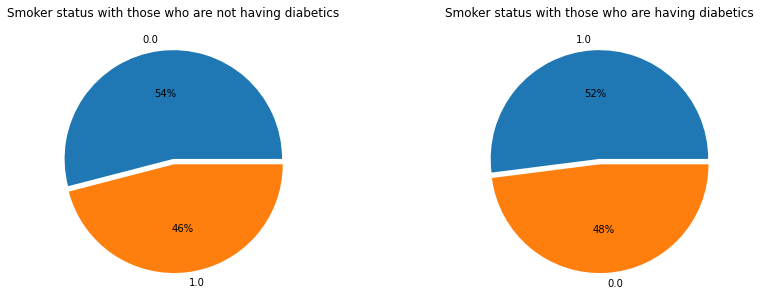

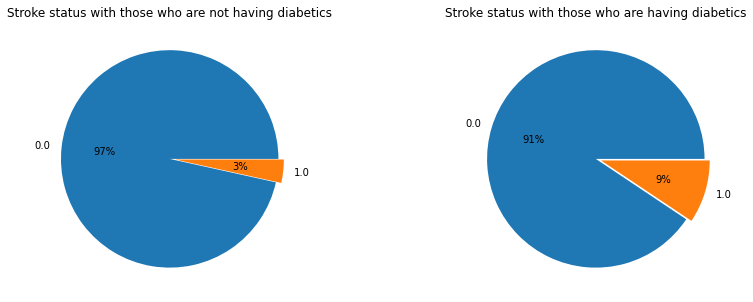

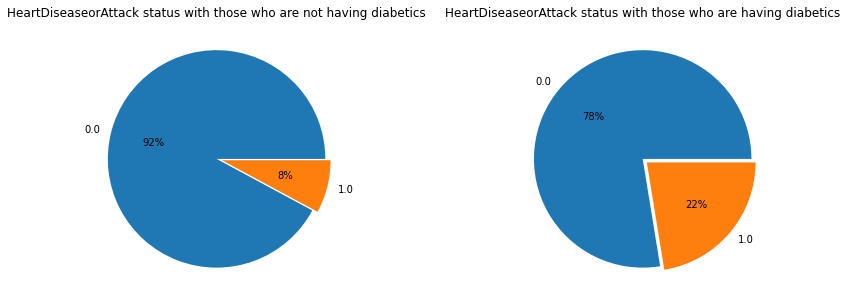

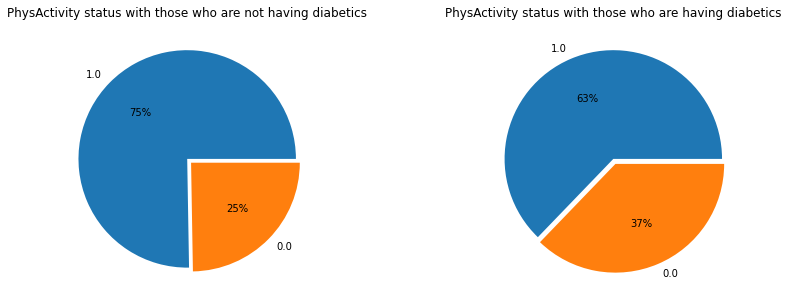

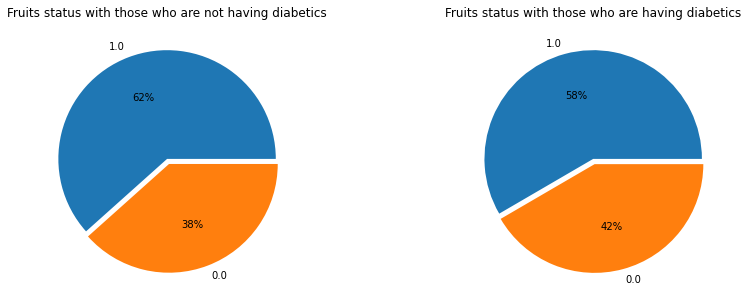

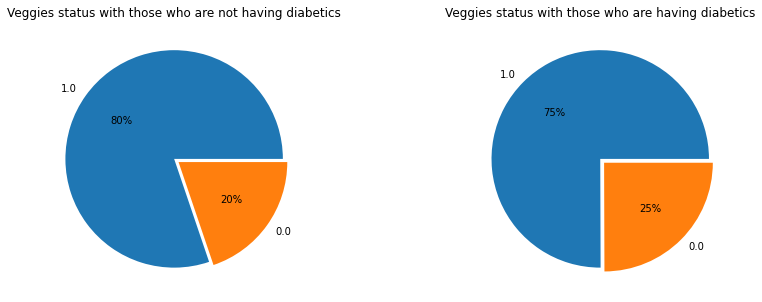

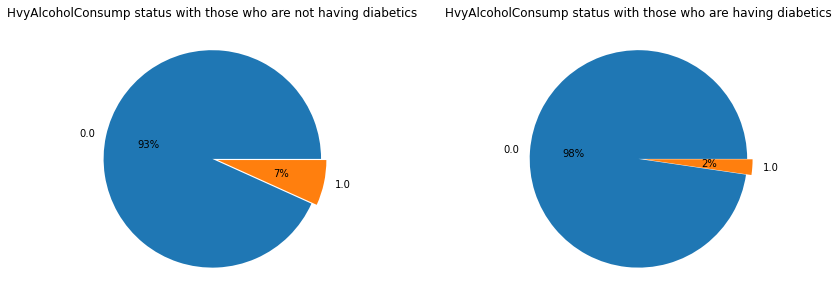

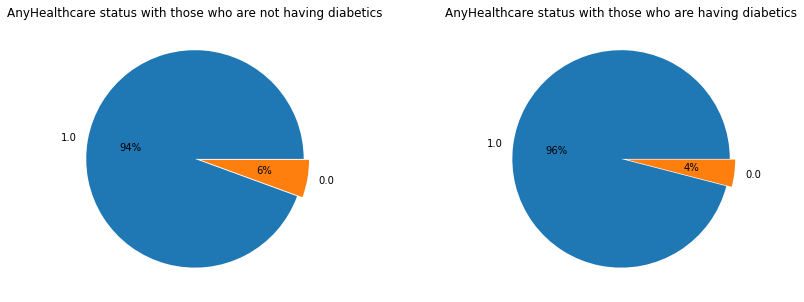

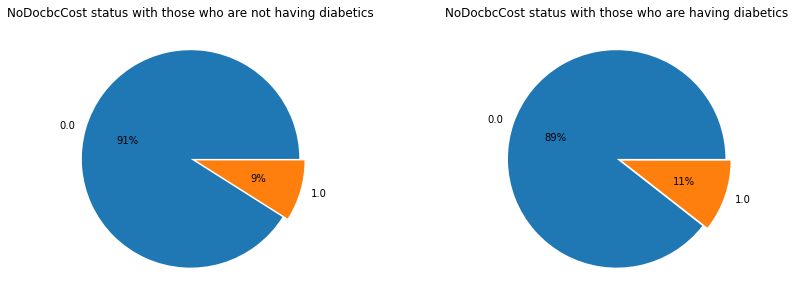

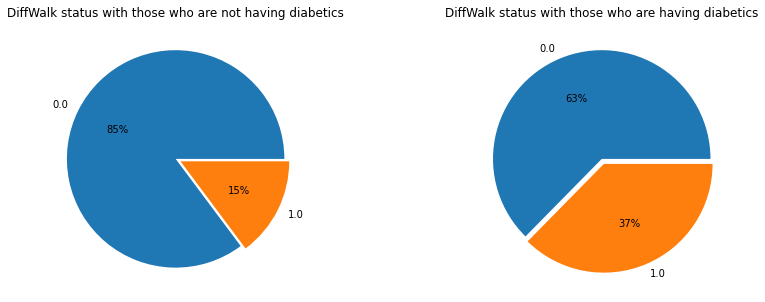

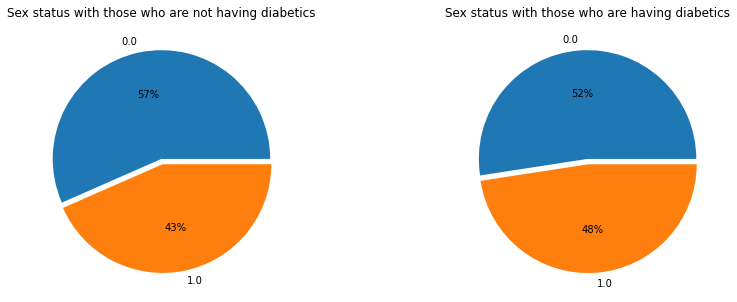

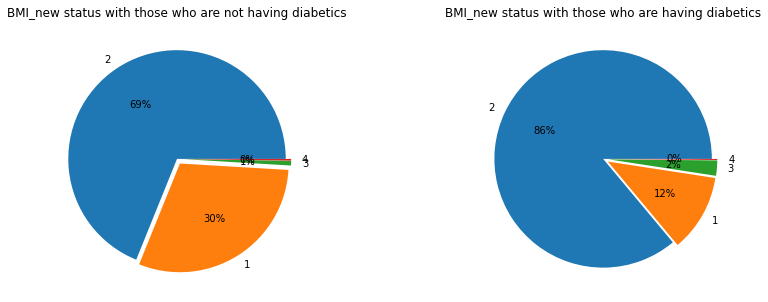

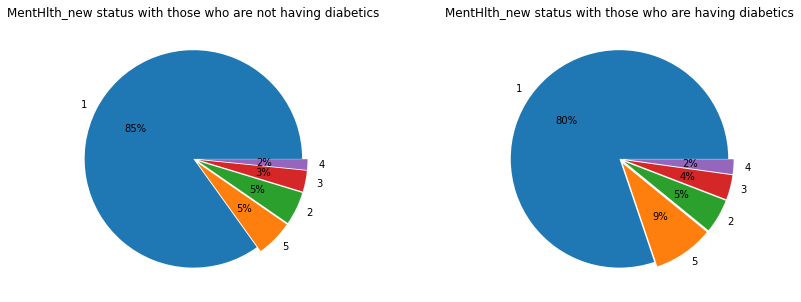

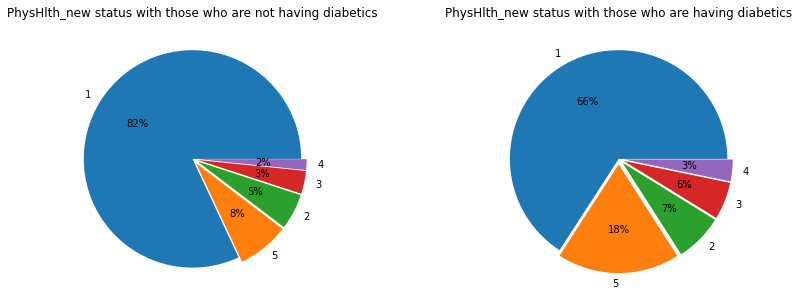

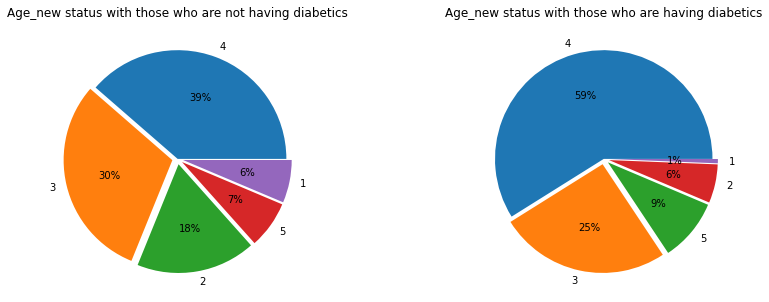

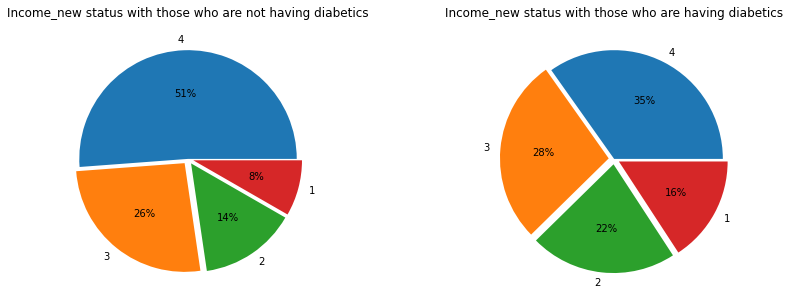

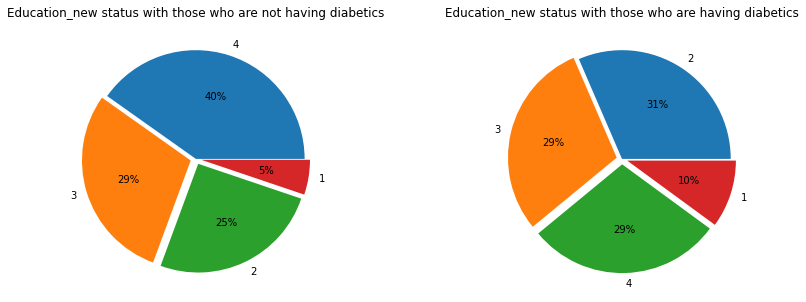

In [1147]:
#Plotting Percentages with pie charts
eda_list=list(df_new.drop("Diabetes_binary",axis=1).columns)
for col_name in eda_list:
  
    df_temp=df_new.loc[:,["Diabetes_binary",col_name]]
   
    labels=list(df_temp[col_name].unique())
   
    #creating tuple for exploding plots
    t=(0.05,)*(len(labels)-1)
    explode = (0,)+t
        
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
    
    #plotting pie charts related to those who are not having diabetics
    df_temp[df_temp["Diabetes_binary"]==0][col_name].value_counts(normalize=True).plot(kind="pie",
                                title=col_name+" status with "'those who are not having diabetics', autopct='%1.0f%%',ylabel="",ax=ax1,explode=explode)

    #plotting pie charts related to those who are having diabetics
    df_temp[df_temp["Diabetes_binary"]==1][col_name].value_counts(normalize=True).plot(kind="pie",
                                title=col_name+" status with "'those who are having diabetics', autopct='%1.0f%%',ylabel="",ax=ax2,explode=explode)
    


    plt.savefig(col_name+'.png', dpi=300)

### One-Hot Encoding

In [176]:
#Converting in to object type to do one-hot encoding
df_new["BMI_new"]= df_new["BMI_new"].astype("object") 
df_new["MentHlth_new"]= df_new["MentHlth_new"].astype("object") 
df_new["PhysHlth_new"]= df_new["PhysHlth_new"].astype("object") 
df_new["Age_new"]= df_new["Age_new"].astype("object") 
df_new["Income_new"]= df_new["Income_new"].astype("object")
df_new["Education_new"]= df_new["Education_new"].astype("object")

In [177]:
#one-hot encoding
data=pd.get_dummies(df_new)

In [178]:
data.head(3)

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Age_new_4,Age_new_5,Income_new_1,Income_new_2,Income_new_3,Income_new_4,Education_new_1,Education_new_2,Education_new_3,Education_new_4
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,1,0,0,1,0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,0,1,0,0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,1,0


In [30]:
data.shape

(49398, 42)

## Feature Engineering

### Feature selection using Chi-Square Method

Original number of features: (49398, 41)
Scores of Features : 

HighBP  : 1758.5823070291642
HighChol  : 1141.7397247130416
CholCheck  : 14.388920725030797
Smoker  : 66.9652044480932
Stroke  : 436.03777936128495
HeartDiseaseorAttack  : 1172.6236753711644
PhysActivity  : 190.76496243754266
Fruits  : 22.234201013381266
Veggies  : 26.726004452442517
HvyAlcoholConsump  : 354.1582249346791
AnyHealthcare  : 2.1891965930805446
NoDocbcCost  : 24.49889801490809
DiffWalk  : 1680.796526677795
Sex  : 31.033643246789318
Diabetes_binary  : 1428.3122618238053
BMI_new_1  : 314.6046958409753
BMI_new_2  : 166.51018645078383
BMI_new_3  : 0.2826487444024903
BMI_new_4  : 25.32137387749112
MentHlth_new_1  : 0.07245291752698108
MentHlth_new_2  : 8.133587738022152
MentHlth_new_3  : 23.345957661056158
MentHlth_new_4  : 156.71081187348705
MentHlth_new_5  : 303.46769002507926
PhysHlth_new_1  : 38.669256945612915
PhysHlth_new_2  : 111.37494403908781
PhysHlth_new_3  : 106.91021195006307
PhysHlth_new_4  : 708.39804

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

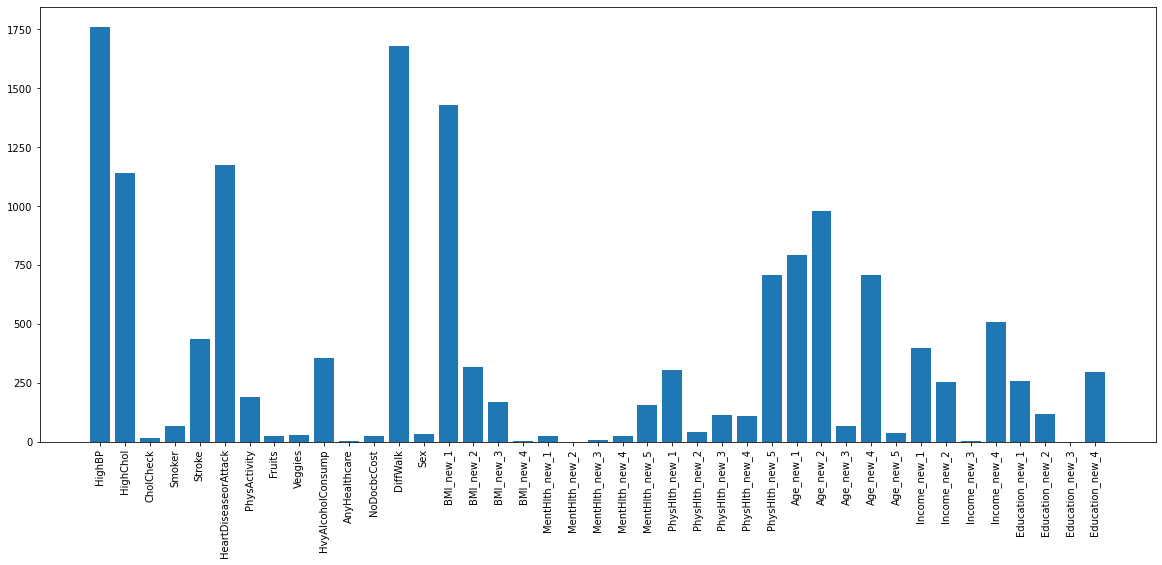

In [827]:
#importing necessary packages
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#splliting X and Y
X = data.drop("Diabetes_binary",axis=1)
Y = data["Diabetes_binary"]

#converting object type into int
X.astype("int")
Y.astype("int")

#splitting into training and testing data set
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=1)

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)

print('Original number of features:', X.shape)
print("Scores of Features :","\n")

#printing scores of features
column_names=data.columns
for i in range(len(fs.scores_)):
    print(column_names[i]," :", fs.scores_[i])

#plotting feature scores
plt.figure(figsize=(20,8))
plt.bar(X.columns, fs.scores_)

plt.xticks(rotation=90)

In [180]:
#developing function to separate feature colum names related to k value
#here k=11

#defining empty lists
feature_list=[]
feat_scores=[]
feat_names=[]

#defining empty dictionary to add features that have high accuracy
dic_feat={}
for i in range(len(fs.scores_)):
    dic_feat[column_names[i]]=fs.scores_[i]

        
#Separating column names related to k value

k=11
feat_scores=list(dic_feat.values())
feat_names=list(dic_feat.keys())

new_scores=sorted(feat_scores)
new_scores=new_scores[-k:] 

new_scores.reverse()
# feat_names,dic_feat

need_features=[]
for j in range(len(new_scores)):
    need_features.append(feat_names[feat_scores.index(new_scores[j])])
    
need_features    



['HighBP',
 'DiffWalk',
 'Diabetes_binary',
 'HeartDiseaseorAttack',
 'HighChol',
 'Age_new_1',
 'PhysHlth_new_5',
 'Age_new_3',
 'PhysHlth_new_4',
 'Income_new_3',
 'Stroke']

## Machine Learning Prediction Model


In [902]:
#Getting new dataframe to develop machine learning model
ml_data=data.loc[:,need_features]
X=ml_data.drop("Diabetes_binary",axis=1)
Y=ml_data["Diabetes_binary"]

In [846]:
#splitting training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [847]:
#Checking whether the trained data is balanced or not
y_train.value_counts()

1.0    18615
0.0    18433
Name: Diabetes_binary, dtype: int64

In [302]:
#importing necessary packages

from sklearn import model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')


In [47]:
pip install --upgrade scikit-learn

### Defining Models

In [622]:
#Defining models
import xgboost as xgb
knn=KNeighborsClassifier()
rf=RandomForestClassifier()
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()
bnb=BernoulliNB()
# cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
# ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
#              'objective': 'binary:logistic'}
# xgb=GridSearchCV(xgb.XGBClassifier(**ind_params), cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
xgb=xgb.XGBClassifier()


#### Defining Neural Network Models

In [412]:
#importing necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [734]:
#Developing Model
model = Sequential()
model.add(Dense(len(need_features)-1, input_shape=(len(need_features)-1,), activation='relu')) 
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# evaluate model with standardized dataset
# keras_model = KerasClassifier(model=model, epochs=2, batch_size=5, verbose=1)
keras_model = KerasClassifier(model=model)


In [429]:
#Developing MLP
random_state=21069826
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(activation='logistic', solver='adam', alpha=0.0001, max_iter=1000, hidden_layer_sizes=(20,), random_state=random_state)

mlp=MLPClassifier()


### Classification reports and Confusion matrix for each Model

In [416]:
#Creating method to get clssification reports
from sklearn.metrics import accuracy_score, classification_report
def classification_report(model):
    
    from sklearn.metrics import accuracy_score, classification_report
    
    #Fitting model
    model.fit(X_train, y_train)

    # predicting values on test data
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    classificationreport = classification_report(y_test, predictions,output_dict=True) 
    df_classi_report=pd.DataFrame(classificationreport)
    create_confusion_matrix(model)
    return df_classi_report

In [353]:
def create_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
                fmt='.2%', cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

#### K-Nearest Neighbour Classification Report & Confusion Matrix

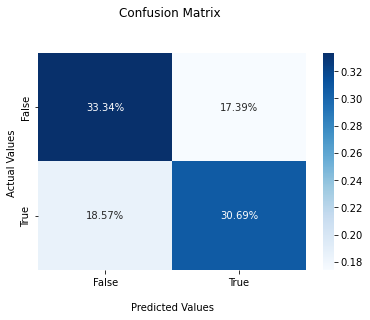

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.642233,0.638262,0.640324,0.640248,0.640277
recall,0.657198,0.622945,0.640324,0.640072,0.640324
f1-score,0.649629,0.630511,0.640324,0.640070,0.640211
support,6266.000000,6084.000000,0.640324,12350.000000,12350.000000


In [417]:
knn_classi=classification_report(knn)
knn_classi

#### Random Forest Classification Report & Confusion Matrix

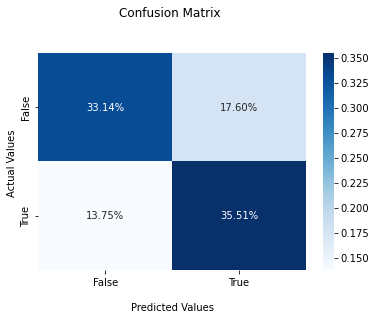

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.706786,0.668699,0.686559,0.687743,0.688024
recall,0.653208,0.720907,0.686559,0.687058,0.686559
f1-score,0.678942,0.693823,0.686559,0.686382,0.686273
support,6266.000000,6084.000000,0.686559,12350.000000,12350.000000


In [418]:
random_classi=classification_report(rf)
random_classi

#### Logistic Regression Classification Report & Confusion Matrix

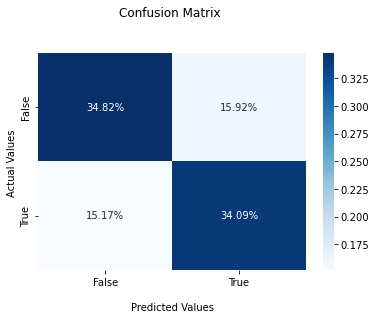

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.696469,0.681671,0.689069,0.689070,0.689179
recall,0.686243,0.691979,0.689069,0.689111,0.689069
f1-score,0.691318,0.686786,0.689069,0.689052,0.689086
support,6266.000000,6084.000000,0.689069,12350.000000,12350.000000


In [677]:
logi_classi=classification_report(lr)
logi_classi

#### Decision Tree Classification Report & Confusion Matrix

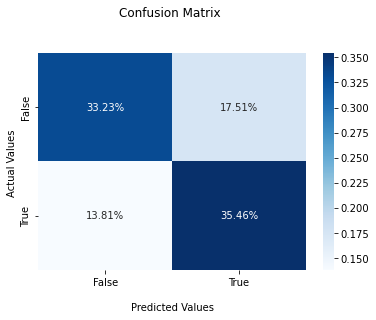

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.706490,0.669470,0.686883,0.687980,0.688252
recall,0.654963,0.719757,0.686883,0.687360,0.686883
f1-score,0.679752,0.693703,0.686883,0.686727,0.686624
support,6266.000000,6084.000000,0.686883,12350.000000,12350.000000


In [420]:
dt_classi=classification_report(dt)
dt_classi

#### Support Vector Machine Classification Report & Confusion Matrix

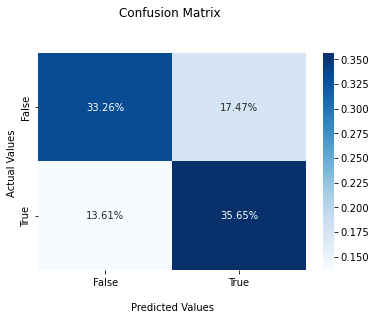

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.709622,0.671087,0.68915,0.690354,0.690638
recall,0.655602,0.723702,0.68915,0.689652,0.689150
f1-score,0.681543,0.696402,0.68915,0.688972,0.688863
support,6266.000000,6084.000000,0.68915,12350.000000,12350.000000


In [435]:
svm_classi=classification_report(svm)
svm_classi

#### Binomial Naive Bayes Classification Report & Confusion Matrix

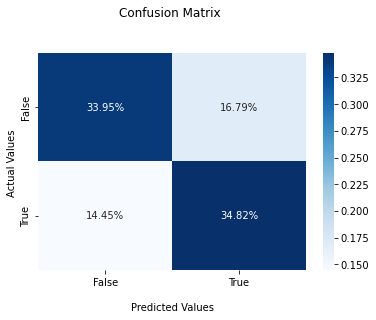

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.701523,0.674721,0.687692,0.688122,0.688319
recall,0.669167,0.706772,0.687692,0.687969,0.687692
f1-score,0.684963,0.690375,0.687692,0.687669,0.687629
support,6266.000000,6084.000000,0.687692,12350.000000,12350.000000


In [432]:
bnb_classi=classification_report(bnb)
bnb_classi

#### XGBoost Classification Report & Confusion Matrix

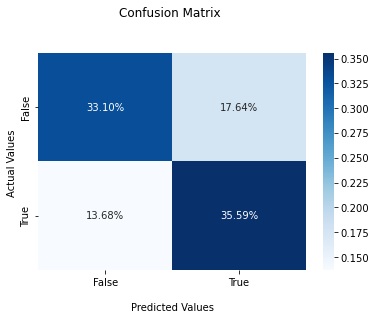

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.707634,0.668644,0.686883,0.688139,0.688426
recall,0.652410,0.722387,0.686883,0.687398,0.686883
f1-score,0.678901,0.694477,0.686883,0.686689,0.686574
support,6266.000000,6084.000000,0.686883,12350.000000,12350.000000


In [422]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xg_classi=classification_report(xgb)
xg_classi

#### Sequential Model Classification Report & Confusion Matrix

386/386 [==============================] - 0s 595us/step


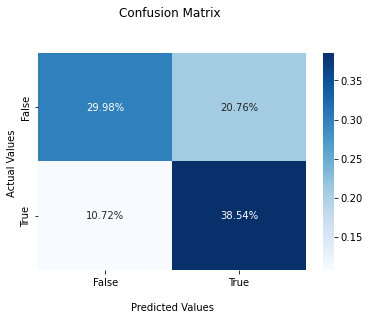

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.736570,0.649918,0.685182,0.693244,0.693882
recall,0.590808,0.782380,0.685182,0.686594,0.685182
f1-score,0.655685,0.710024,0.685182,0.682855,0.682454
support,6266.000000,6084.000000,0.685182,12350.000000,12350.000000


In [765]:
keras_model = KerasClassifier(model=model)
seq_classi=classification_report(keras_model)
seq_classi

#### MLP Classification Report & Confusion Matrix

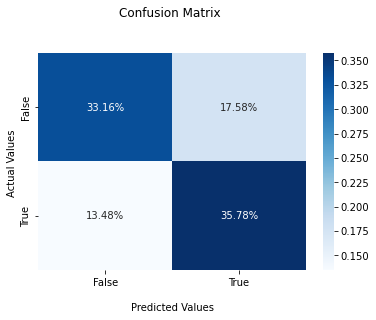

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.710938,0.670561,0.689393,0.690749,0.691047
recall,0.653527,0.726331,0.689393,0.689929,0.689393
f1-score,0.681024,0.697333,0.689393,0.689179,0.689059
support,6266.000000,6084.000000,0.689393,12350.000000,12350.000000


In [681]:
mlp_classi=classification_report(mlp)
mlp_classi

### Cross Validation for each model

In [631]:
def model_cross_validation(model):
    
    # prepare configuration for cross validation 
    models = []
    models.append(model)

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=None)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return cv_results
    

In [632]:
def model_comparison(results,names):
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Model Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.xlabel("Machine Learning Models")
    plt.ylabel("Score")
    plt.show()

In [625]:
all_results=[]
res=model_cross_validation(("knn",KNeighborsClassifier()))
all_results.append(res)

knn: 0.663706 (0.019273)


In [626]:
res=model_cross_validation(("rf",RandomForestClassifier()))
all_results.append(res)

rf: 0.696475 (0.009367)


In [627]:
res=model_cross_validation(("lr",LogisticRegression()))
all_results.append(res)

lr: 0.698094 (0.008957)


In [628]:
res=model_cross_validation(("svm",SVC()))
all_results.append(res)

svm: 0.696637 (0.008092)


In [629]:
res=model_cross_validation(("dt",DecisionTreeClassifier()))
all_results.append(res)

dt: 0.696475 (0.008479)


In [671]:
res=model_cross_validation(("bnb",bnb))
all_results.append(res)

bnb: 0.698823 (0.008788)


In [672]:
res=model_cross_validation(("XGB",xgb))
all_results.append(res)

XGB: 0.696475 (0.008537)


In [673]:
res=model_cross_validation(("sequential",keras_model))
all_results.append(res)

INFO:tensorflow:Assets written to: C:\Users\jhcha\AppData\Local\Temp\tmpye7op15x\assets
116/116 [==============================] - 0s 793us/step
INFO:tensorflow:Assets written to: C:\Users\jhcha\AppData\Local\Temp\tmp1psai89t\assets
116/116 [==============================] - 0s 670us/step
INFO:tensorflow:Assets written to: C:\Users\jhcha\AppData\Local\Temp\tmpx83h_o1d\assets
116/116 [==============================] - 0s 648us/step
INFO:tensorflow:Assets written to: C:\Users\jhcha\AppData\Local\Temp\tmp8nruldjn\assets
116/116 [==============================] - 0s 769us/step
INFO:tensorflow:Assets written to: C:\Users\jhcha\AppData\Local\Temp\tmpqgs2bctg\assets
116/116 [==============================] - 0s 776us/step
INFO:tensorflow:Assets written to: C:\Users\jhcha\AppData\Local\Temp\tmppcdc_zkh\assets
116/116 [==============================] - 0s 837us/step
INFO:tensorflow:Assets written to: C:\Users\jhcha\AppData\Local\Temp\tmpnudjdtog\assets
116/116 [==============================] -

In [674]:
res=model_cross_validation(("mlp",mlp))
all_results.append(res)

mlp: 0.698526 (0.007967)


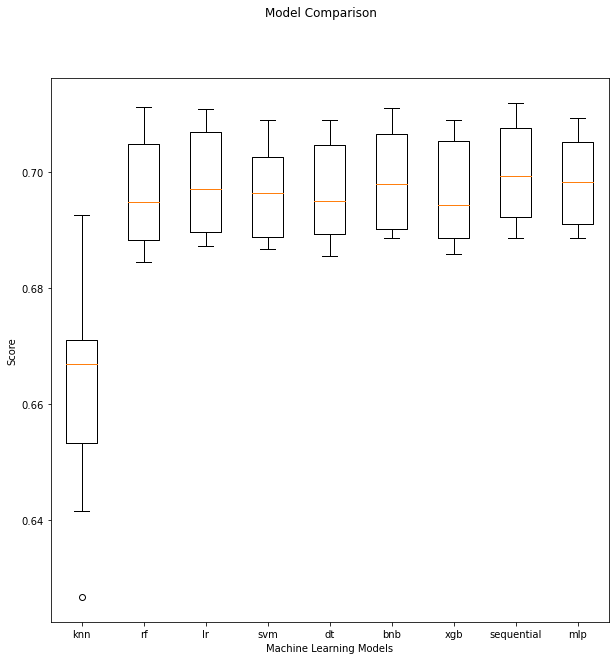

In [676]:
model_comparison(all_results,["knn","rf","lr","svm","dt","bnb","xgb","sequential","mlp"])

### ROC Curves and AUC

In [146]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [781]:
def ROC_AUC1(model):
    #define metrics
    # y_score=knn.fit(X_train, y_train)
    # knn=KNeighborsClassifier()
    from sklearn import metrics
    model.fit(X_train,y_train)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    

In [797]:
def ROC_AUC(model,name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).ravel()
    fpr_model, tpr_model, thresholds_model = roc_curve(y_test, y_pred)
    auc_model = auc(fpr_model, tpr_model)
    plt.plot(fpr_model, tpr_model, label=name+' (area = {:.5f})'.format(auc_model))
    plt.legend(loc=4)
    

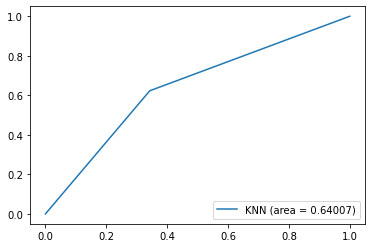

In [798]:
ROC_AUC(knn,"KNN")

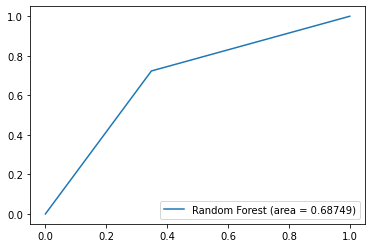

In [799]:
ROC_AUC(rf,"Random Forest")

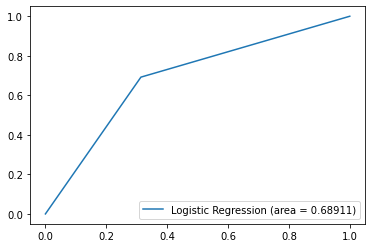

In [804]:
ROC_AUC(lr,"Logistic Regression")

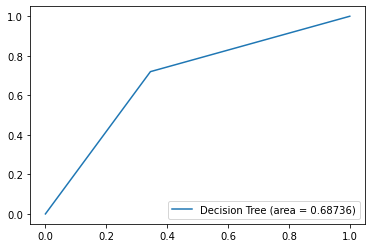

In [805]:
ROC_AUC(dt,"Decision Tree")

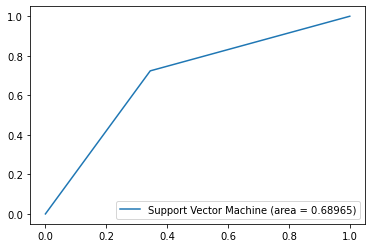

In [529]:
ROC_AUC(svm,"Support Vector Machine")

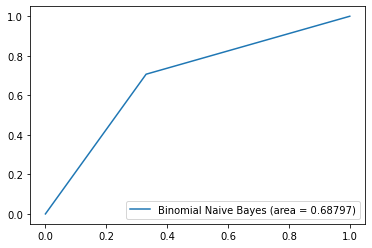

In [530]:
ROC_AUC(bnb,"Binomial Naive Bayes")

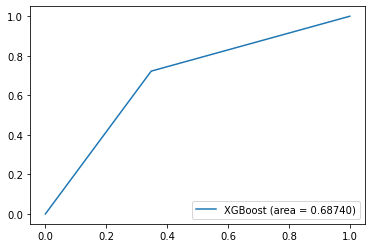

In [806]:
ROC_AUC(xgb,"XGBoost")

386/386 [==============================] - 0s 602us/step


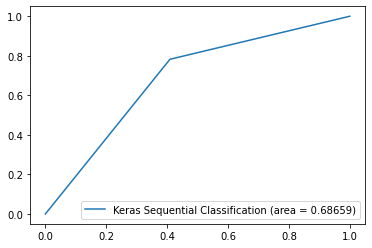

In [802]:
ROC_AUC(keras_model,"Keras Sequential Classification")

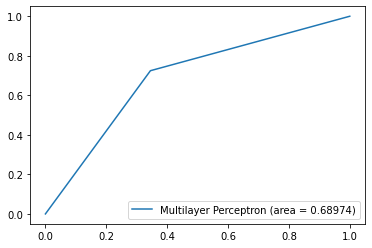

In [803]:
ROC_AUC(mlp,"Multilayer Perceptron")

386/386 [==============================] - 0s 1ms/step


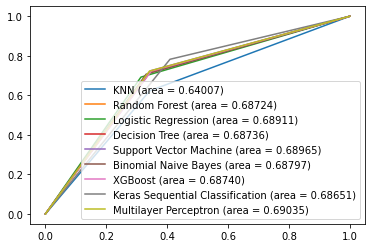

In [807]:
ROC_AUC(knn,"KNN")
ROC_AUC(rf,"Random Forest")
ROC_AUC(lr,"Logistic Regression")
ROC_AUC(dt,"Decision Tree")
ROC_AUC(svm,"Support Vector Machine")
ROC_AUC(bnb,"Binomial Naive Bayes")
ROC_AUC(xgb,"XGBoost")
ROC_AUC(keras_model,"Keras Sequential Classification")
ROC_AUC(mlp,"Multilayer Perceptron")

In [159]:
!pip install scikeras

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [829]:
pip install keras-tuner --upgrade

### Hyper Parameter Tunning for Keras

In [1148]:
import keras_tuner
from tensorflow import keras

In [1163]:
#Developing Model
model = Sequential()
model.add(Dense(len(need_features)-1, input_shape=(len(need_features)-1,), activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#evaluate model with standardized dataset
keras_model = KerasClassifier(model=model, epochs=10, batch_size=128, verbose=1)


In [1164]:

keras_model.fit(X_train,y_train)

Epoch 1/10
290/290 [==============================] - 1s 1ms/step - loss: 0.6488 - accuracy: 0.6148
Epoch 2/10
290/290 [==============================] - 0s 958us/step - loss: 0.5928 - accuracy: 0.6930
Epoch 3/10
290/290 [==============================] - 0s 841us/step - loss: 0.5845 - accuracy: 0.6970
Epoch 4/10
290/290 [==============================] - 0s 810us/step - loss: 0.5829 - accuracy: 0.6987
Epoch 5/10
290/290 [==============================] - 0s 851us/step - loss: 0.5823 - accuracy: 0.6991
Epoch 6/10
290/290 [==============================] - 0s 927us/step - loss: 0.5820 - accuracy: 0.6987
Epoch 7/10
290/290 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.6990
Epoch 8/10
290/290 [==============================] - 0s 1ms/step - loss: 0.5817 - accuracy: 0.6993
Epoch 9/10
290/290 [==============================] - 0s 953us/step - loss: 0.5816 - accuracy: 0.6993
Epoch 10/10
290/290 [==============================] - 0s 940us/step - loss: 0.5815 - ac

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x000001E2E3C69E80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [1165]:
keras_model.score(X_test,y_test)

97/97 [==============================] - 0s 1ms/step


0.6893117408906883

Epoch 1/10
290/290 [==============================] - 0s 945us/step - loss: 0.5814 - accuracy: 0.6996
Epoch 2/10
290/290 [==============================] - 0s 940us/step - loss: 0.5813 - accuracy: 0.6997
Epoch 3/10
290/290 [==============================] - 0s 859us/step - loss: 0.5812 - accuracy: 0.6997
Epoch 4/10
290/290 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.6995
Epoch 5/10
290/290 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.6996
Epoch 6/10
290/290 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.6995
Epoch 7/10
290/290 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.6996
Epoch 8/10
290/290 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.6997
Epoch 9/10
290/290 [==============================] - 0s 960us/step - loss: 0.5811 - accuracy: 0.6993
Epoch 10/10
97/97 [==============================] - 0s 1ms/step


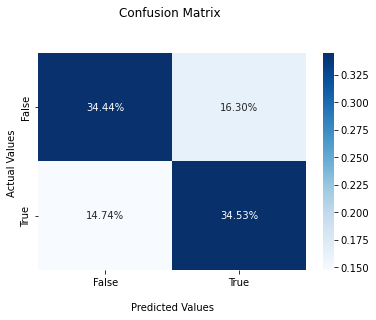

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.700313,0.679305,0.689636,0.689809,0.689964
recall,0.678742,0.700855,0.689636,0.689799,0.689636
f1-score,0.689359,0.689912,0.689636,0.689635,0.689631
support,6266.000000,6084.000000,0.689636,12350.000000,12350.000000


In [1166]:
keras_classi=classification_report(keras_model)
keras_classi